## Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

## Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from pprint import pprint

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats import diagnostic as diag
from scipy import stats
from scipy.stats.stats import pearsonr


# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [2]:
#Loading the dataset
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [3]:
#shape of data
df.shape

(205, 26)

In [4]:
#dtypes of columns
df.dtypes

car_ID              int64  
symboling           int64  
CarName             object 
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
dtype: object

In [5]:
#missing data in the dataset
df.isnull().sum().sort_values(ascending=False).head(5)

price         0
highwaympg    0
symboling     0
CarName       0
fueltype      0
dtype: int64

In [6]:
# Extracting Car Company Name from the CarName as per direction in Problem 

df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [7]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Typo Error in Car Company name**
- maxda = mazda
- nissan = Nissan
- porsche = porcshce
- toyota = toyouta
- volkswagen = vokswagen, vw

In [8]:
# Renaming the typo errors in Car Company names

df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [9]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df['symboling'] = df['symboling'].astype(str)

In [10]:
# checking for duplicates

df.loc[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## Univariate Analysis

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

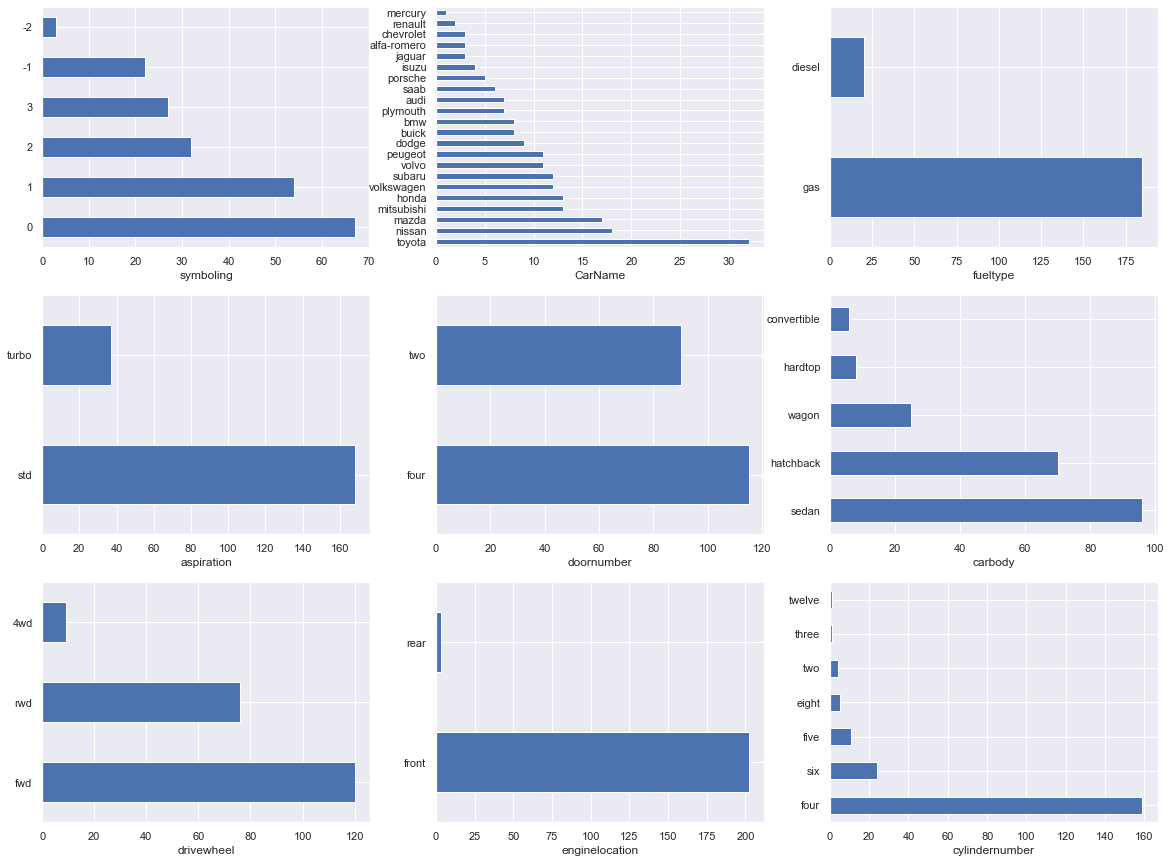

In [12]:
#Univarite Analysis
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
df['symboling'].value_counts().plot(kind= 'barh')
plt.xlabel('symboling')
plt.subplot(3,3,2)
df['CarName'].value_counts().plot(kind= 'barh')
plt.xlabel('CarName')
plt.subplot(3,3,3)
df['fueltype'].value_counts().plot(kind= 'barh')
plt.xlabel('fueltype')
plt.subplot(3,3,4)
df['aspiration'].value_counts().plot(kind= 'barh')
plt.xlabel('aspiration')
plt.subplot(3,3,5)
df['doornumber'].value_counts().plot(kind= 'barh')
plt.xlabel('doornumber')
plt.subplot(3,3,6)
df['carbody'].value_counts().plot(kind= 'barh')
plt.xlabel('carbody')
plt.subplot(3,3,7)
df['drivewheel'].value_counts().plot(kind= 'barh')
plt.xlabel('drivewheel')
plt.subplot(3,3,8)
df['enginelocation'].value_counts().plot(kind= 'barh')
plt.xlabel('enginelocation')
plt.subplot(3,3,9)
df['cylindernumber'].value_counts().plot(kind= 'barh')
plt.xlabel('cylindernumber')
plt.show()

## Insights

- Symboling - Most of the cars have neutral to good rating.
- Toyota is the most bought car
- Sedan is the most preferred car type
- Aspiration - Most of the cars are naturally aspirated cars
- Petrol cars are preferred over diesel cars
- Drive wheel - most of the cars have drive wheel in the front
- Engine location - Almost all the cars have engine in the front
- 3/4th of the cars have four cylinders.

### Target Variable - Price

Text(0.5, 0, 'price')

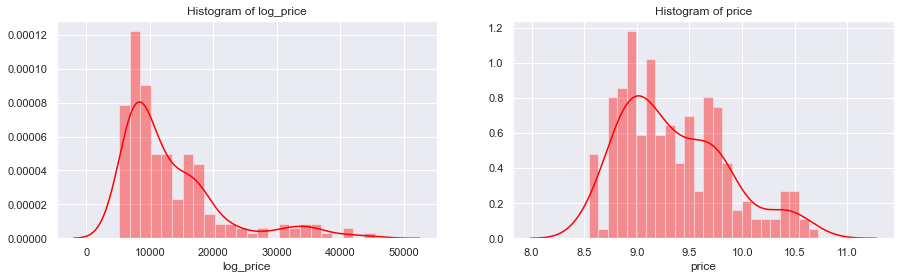

In [13]:
#Histogram of price vs log_price

df['log_price'] = np.log(df['price'])
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['price'], bins=24,color='red')
plt.title("Histogram of log_price")
plt.xlabel("log_price")
plt.subplot(1,2,2)
sns.distplot(df['log_price'], bins=24,color='red')
plt.title("Histogram of price")
plt.xlabel("price")

### After log transform, Price is normally distributed. We will use 'log_price' as our target variable

## Bivariate Analysis

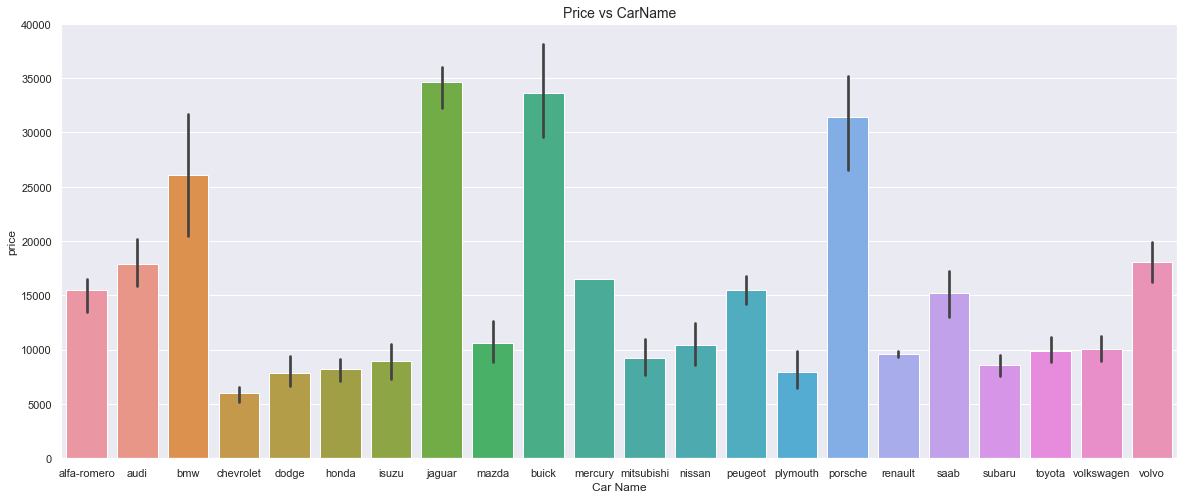

In [14]:
# Price vs CarName
plt.figure(figsize=(20,8))
sns.barplot(x = 'CarName', y = 'price', data=df)
plt.xlabel("Car Name", fontsize=12)
plt.title("Price vs CarName", fontsize=14)

plt.show()

### bmw, buick, jaguar, porsche are priced higher than rest of the cars

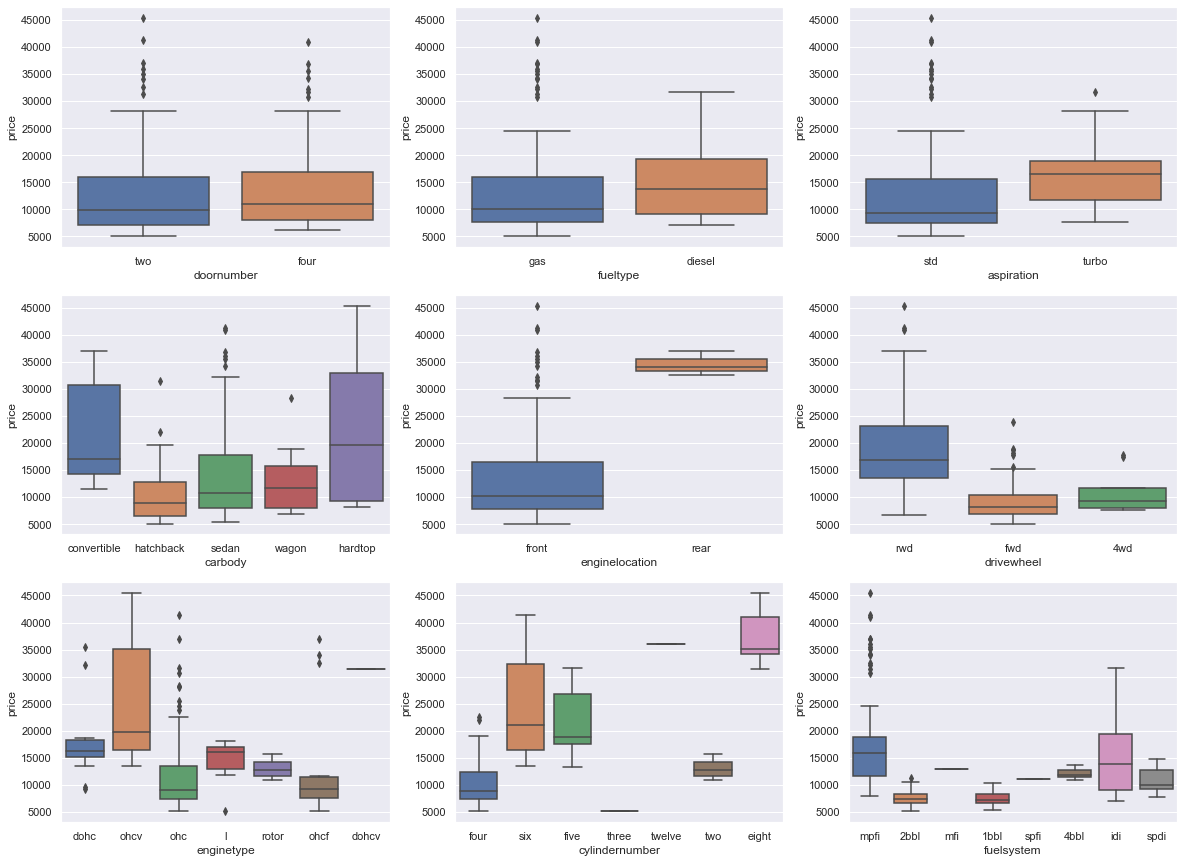

In [15]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

### Insights

- Number of doors does not make any impact on price
- Both petrol and diesel type cars are almost equally priced
- Turbo boosted vehicles are priced higher than naturally aspirated vehicles
- Hardtop and convertible cars are priced higher than other body types
- Cars are priced higher for engines located in back than in front
- rwd - rear drive wheeled vehicles are priced higher than fwd,4wd
- Price is directly propotional to the number of cylinders

## Data Preparation

#### Creating Dummy variables for categorical data

In [16]:
#converting symboling to numerical
df.symboling = df.symboling.astype(int)

In [17]:
var_car = ['CarName']

In [18]:
cat_var = ['fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel',
           'enginelocation', 'enginetype', 'cylindernumber','fuelsystem']

In [19]:
dummies = pd.get_dummies(df[cat_var], drop_first = True)
dummies_cars = pd.get_dummies(df[var_car])

In [20]:
# Add the results to the original dataframe

df = pd.concat([df, dummies,dummies_cars], axis = 1)
df.drop(cat_var,axis=1,inplace = True)
df.drop(var_car,axis=1,inplace = True)

In [21]:
df.shape

(205, 68)

### Rescaling the Features

In [22]:
scaler = preprocessing.StandardScaler()
num_var = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'log_price']

df[num_var] = scaler.fit_transform(df[num_var])

In [23]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,log_price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,13276.7106,-0.0000,0.9024,0.1805,0.4390,0.0390,0.3415,0.4683,0.1220,0.5854,0.3707,0.0146,0.0049,0.0585,0.7220,0.0732,0.0634,0.0195,0.0537,0.7756,0.1171,0.0049,0.0049,0.0195,0.3220,0.0146,0.0976,0.0049,0.4585,0.0439,0.0049,0.0146,0.0341,0.0390,0.0390,0.0146,0.0439,0.0634,0.0195,0.0146,0.0829,0.0049,0.0634,0.0878,0.0537,0.0341,0.0244,0.0098,0.0293,0.0585,0.1561,0.0585,0.0537
std,59.3226,1.0024,1.0024,1.0024,1.0024,1.0024,1.0024,1.0024,1.0024,1.0024,1.0024,1.0024,1.0024,1.0024,1.0024,7988.8523,1.0024,0.2974,0.3855,0.4975,0.1941,0.4754,0.5002,0.3280,0.4939,0.4842,0.1204,0.0698,0.2353,0.4491,0.2611,0.2443,0.1387,0.2259,0.4182,0.3223,0.0698,0.0698,0.1387,0.4684,0.1204,0.2974,0.0698,0.4995,0.2054,0.0698,0.1204,0.1820,0.1941,0.1941,0.1204,0.2054,0.2443,0.1387,0.1204,0.2764,0.0698,0.2443,0.2837,0.2259,0.1820,0.1546,0.0985,0.1690,0.2353,0.3638,0.2353,0.2259
min,1.0000,-2.2814,-2.0237,-2.6772,-2.6205,-2.4307,-2.0553,-1.5866,-2.9230,-3.7893,-0.7931,-1.4226,-2.0493,-1.8724,-2.1473,5118.0000,-1.6200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,52.0000,-0.6715,-0.7086,-0.6297,-0.8448,-0.7076,-0.7904,-0.7199,-0.6653,-0.4648,-0.3893,-0.8649,-0.6833,-0.9530,-0.8372,7788.0000,-0.7846,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,103.0000,0.1335,-0.2924,-0.0690,-0.1906,0.1539,-0.2726,-0.1663,-0.0731,0.1106,-0.2883,-0.2311,0.1574,-0.1869,-0.1094,10295.0000,-0.2293,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.

## Model Building

In [24]:
# Train test split
X= df.drop(columns=['price','log_price'])
y= df[['log_price']]

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

### Model 1

In [25]:
# As a initial starting point we will use carnames as our features

In [26]:
carname = ['CarName_alfa-romero', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo']

In [27]:
predictor1 = carname

In [28]:
X_train1 = X_train[predictor1]
X_train1 = sm.add_constant(X_train1)
model_1 = sm.OLS(y_train, X_train1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     20.18
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           3.87e-32
Time:                        20:37:23   Log-Likelihood:                -121.00
No. Observations:                 164   AIC:                             284.0
Df Residuals:                     143   BIC:                             349.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1595    

In [29]:
#Picking only significant variables from model 1 for model 2

In [30]:
sig = [ 'CarName_audi', 'CarName_bmw', 'CarName_buick','CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu','CarName_jaguar',
       'CarName_mazda','CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche','CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo']

### Model 2

In [31]:
#Adding more variables to check the performance

In [32]:
struc = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [33]:
#correlation matrix for predictor variables excluding dummy variables
car = df[struc]
car.corr(method ='pearson')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.0000,-0.5320,-0.3576,-0.2329,-0.5410,-0.2277,-0.1058,-0.1301,-0.0087,-0.1785,0.0709,0.2736,-0.0358,0.0346,-0.0800
wheelbase,-0.5320,1.0000,0.8746,0.7951,0.5894,0.7764,0.5693,0.4887,0.1610,0.2498,0.3533,-0.3605,-0.4704,-0.5441,0.5778
carlength,-0.3576,0.8746,1.0000,0.8411,0.4910,0.8777,0.6834,0.6065,0.1295,0.1584,0.5526,-0.2872,-0.6709,-0.7047,0.6829
carwidth,-0.2329,0.7951,0.8411,1.0000,0.2792,0.8670,0.7354,0.5591,0.1829,0.1811,0.6407,-0.2200,-0.6427,-0.6772,0.7593
carheight,-0.5410,0.5894,0.4910,0.2792,1.0000,0.2956,0.0671,0.1711,-0.0553,0.2612,-0.1088,-0.3204,-0.0486,-0.1074,0.1193
curbweight,-0.2277,0.7764,0.8777,0.8670,0.2956,1.0000,0.8506,0.6485,0.1688,0.1514,0.7507,-0.2662,-0.7574,-0.7975,0.8353
enginesize,-0.1058,0.5693,0.6834,0.7354,0.0671,0.8506,1.0000,0.5838,0.2031,0.0290,0.8098,-0.2447,-0.6537,-0.6775,0.8741
boreratio,-0.1301,0.4887,0.6065,0.5591,0.1711,0.6485,0.5838,1.0000,-0.0559,0.0052,0.5737,-0.2550,-0.5845,-0.5870,0.5532
stroke,-0.0087,0.1610,0.1295,0.1829,-0.0553,0.1688,0.2031,-0.0559,1.0000,0.1861,0.0809,-0.0680,-0.0421,-0.0439,0.0794
compressionratio,-0.1785,0.2498,0.1584,0.1811,0.2612,0.1514,0.0290,0.0052,0.1861,1.0000,-0.2043,-0.4357,0.3247,0.2652,0.0680


#### Variables horsepower, curbweight, enginesize have significant correlation with price. Lets add them in our model

In [34]:
var = ['horsepower','curbweight','enginesize']

In [35]:
for i in var:
    sig.append(i)

In [36]:
X_train1 = X_train[sig]
X_train1 = sm.add_constant(X_train1)
model_1 = sm.OLS(y_train, X_train1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     93.16
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           3.15e-72
Time:                        20:37:23   Log-Likelihood:                -10.117
No. Observations:                 164   AIC:                             64.23
Df Residuals:                     142   BIC:                             132.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1392      0

In [37]:
#Picking only significant variables from model 2 for model 3

In [38]:
sig = [ 'CarName_audi', 'CarName_bmw', 'CarName_buick','CarName_dodge',
       'CarName_honda','CarName_mitsubishi', 'CarName_nissan','CarName_plymouth',
       'CarName_porsche','CarName_subaru', 'CarName_toyota','horsepower','curbweight']

### Model 3

In [39]:
struc1 = ['cylindernumber_five', 'cylindernumber_four','cylindernumber_six',
          'cylindernumber_three', 'cylindernumber_twelve','cylindernumber_two',
          'fuelsystem_2bbl', 'fuelsystem_4bbl','fuelsystem_idi', 'fuelsystem_mfi',
          'fuelsystem_mpfi','fuelsystem_spdi', 'fuelsystem_spfi','fueltype_gas',
          'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
          'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
          'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
          'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
          'enginetype_rotor','price']

In [40]:
#correlation matrix for dummy variables
car1 = df[struc1]
car1.corr(method ='pearson')

,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,price
cylindernumber_five,1.0000,-0.4427,-0.0867,-0.0167,-0.0167,-0.0336,-0.1641,-0.0290,0.2135,-0.0167,0.0850,-0.0510,-0.0167,-0.2135,0.2260,-0.0798,0.0638,-0.1258,0.0802,0.0436,-0.0632,-0.0035,-0.0290,-0.0167,-0.0594,0.1478,-0.0669,-0.0620,-0.0336,0.2496
cylindernumber_four,-0.4427,1.0000,-0.6770,-0.1302,-0.1302,-0.2623,0.3456,-0.2266,-0.0202,0.0377,-0.3733,0.1153,0.0377,0.0202,0.0092,-0.0661,-0.1331,0.0668,-0.0342,0.0575,0.4255,-0.4345,-0.2266,-0.1302,0.0843,0.3969,0.0164,-0.4838,-0.2623,-0.6978
cylindernumber_six,-0.0867,-0.6770,1.0000,-0.0255,-0.0255,-0.0514,-0.2509,-0.0444,-0.0686,-0.0255,0.3652,-0.0780,-0.0255,0.0686,-0.0920,0.0142,0.0833,-0.0702,0.0535,-0.0430,-0.3403,0.3802,0.3347,-0.0255,-0.0908,-0.3497,0.0725,0.4033,-0.0514,0.4750
cylindernumber_three,-0.0167,-0.1302,-0.0255,1.0000,-0.0049,-0.0099,0.1016,-0.0085,-0.0230,-0.0049,-0.0644,-0.0150,-0.0049,0.0230,-0.0329,0.0791,-0.0141,0.0972,-0.0657,-0.0261,0.0589,-0.0537,-0.0085,-0.0049,0.2808,-0.1128,-0.0197,-0.0182,-0.0099,-0.0714
cylindernumber_twelve,-0.0167,-0.1302,-0.0255,-0.0049,1.0000,-0.0099,-0.0482,-0.0085,-0.0230,-0.0049,0.0761,-0.0150,-0.0049,0.0230,-0.0329,0.0791,-0.0141,-0.0504,0.0746,-0.0261,-0.0832,0.0912,-0.0085,-0.0049,-0.0175,-0.1128,-0.0197,0.2691,-0.0099,0.1996
cylindernumber_two,-0.0336,-0.2623,-0.0514,-0.0099,-0.0099,1.0000,-0.0972,0.8639,-0.0464,-0.0099,-0.0590,-0.0302,-0.0099,0.0464,-0.0662,0.1595,-0.0284,0.1959,-0.1324,-0.0526,-0.1676,0.1838,-0.0172,-0.0099,-0.0352,-0.2273,-0.0396,-0.0367,1.0000,-0.0045
fuelsystem_2bbl,-0.1641,0.3456,-0.2509,0.1016,-0.0482,-0.0972,1.0000,-0.0840,-0.2266,-0.0482,-0.6341,-0.1477,-0.0482,0.2266,-0.3234,-0.0205,-0.0849,0.1203,-0.0608,0.0303,0.4104,-0.4641,-0.0840,-0.0482,-0.1273,0.2179,0.1271,-0.1793,-0.0972,-0.5014
fuelsystem_4bbl,-0.0290,-0.2266,-0.0444,-0.0085,-0.0085,0.8639,-0.0840,1.0000,-0.0401,-0.0085,-0.1121,-0.0261,-0.0085,0.0401,-0.0572,0.1378,-0.0246,0.1692,-0.1144,-0.0454,-0.1448,0.1588,-0.0149,-0.0085,-0.0304,-0.1964,-0.0342,-0.0317,0.8639,-0.0173
fuelsystem_idi,0.2135,-0.0202,-0.0686,-0.0230,-0.0230,-0.0464,-0.2266,-0.0401,1.0000,-0.0230,-0.3026,-0.0705,-0.0230,-1.0000,0.4014,-0.1915,0.0186,-0.2021,0.1856,0.0282,-0.0903,0.1220,-0.0401,-0.0230,0.2682,0.0206,-0.0924,-0.0856,-0.0464,0.1057
fuelsystem_mfi,-0.0167,0.0377,-0.0255,-0.0049,-0.0049,-0.0099,-0.0482,-0.0085,-0.0230,1.0000,-0.0644,-0.0150,-0.0049,0.0230,0.1492,0.0791,-0.0141,0.0972,-0.0657,-0.0261,0.0589,-0.0537,-0.0085,-0.0049,-0.0175,0.0435,-0.0197,-0.0182,-0.0099,-0.0027


#### Variables cylindernumber_four, drivewheel_fwd, drivewheel_rwd have significant correlation with price. Lets add them in our model

In [41]:
var1 = ['cylindernumber_four','drivewheel_fwd','drivewheel_rwd']
for i in var1:
    sig.append(i)

In [42]:
X_train1 = X_train[sig]
X_train1 = sm.add_constant(X_train1)
model_1 = sm.OLS(y_train, X_train1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     119.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           9.59e-76
Time:                        20:37:23   Log-Likelihood:                -14.348
No. Observations:                 164   AIC:                             62.70
Df Residuals:                     147   BIC:                             115.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0479    

In [43]:
#picking only significant variables for final model

In [44]:
sig = ['CarName_audi', 'CarName_bmw', 'CarName_buick','CarName_dodge',
       'CarName_mitsubishi', 'CarName_nissan','CarName_plymouth',
       'CarName_porsche','CarName_subaru', 'CarName_toyota','horsepower','curbweight']

### Model 4

In [45]:
X_train1 = X_train[sig]
X_train1 = sm.add_constant(X_train1)
model_1 = sm.OLS(y_train, X_train1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     153.2
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           4.83e-78
Time:                        20:37:23   Log-Likelihood:                -19.527
No. Observations:                 164   AIC:                             65.05
Df Residuals:                     151   BIC:                             105.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0271      0

#### With only 12 variables we are able to achieve R squared value of 0.924 out of 67 variables

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,horsepower,3.7200
12,curbweight,3.6100
0,const,2.5500
8,CarName_porsche,1.5400
3,CarName_buick,1.3000
6,CarName_nissan,1.1600
10,CarName_toyota,1.1600
5,CarName_mitsubishi,1.1400
4,CarName_dodge,1.1300
2,CarName_bmw,1.1100


#### VIF of all our variables are less than 5

### Predicting on test data

In [47]:
# Predicting the price of training set.
X_test1 = X_test[sig]
X_test1 = sm.add_constant(X_test1)
actual     = y_test["log_price"]
prediction = model_1.predict(X_test1)

In [48]:
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=prediction)))
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,prediction)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,prediction)))

R squared: 0.9312984727775382
Mean Absolute Error: 0.20013696245736368
Mean Squared Error: 0.06658424620736439


## Checking other Regression Algorithms

### Decision Tree Regressor

In [49]:
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_test)

print("R squared: {}".format(r2_score(y_true=y_test,y_pred=dec_tree_y_pred)))
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,dec_tree_y_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,dec_tree_y_pred)))

R squared: 0.8997096174532015
Mean Absolute Error: 0.23917020445907805
Mean Squared Error: 0.09719957901523198


### Random Forest

In [50]:
#RandomizedSearchCV - Hyperparameter tuning
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000,num = 10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1,2,4]
bootstrap = ['True','False']

random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
               'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

pprint(random_grid)

{'bootstrap': ['True', 'False'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [51]:
#Fitting the model
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              n_iter = 100, cv = 3, verbose = 2, random_state = 1, n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=1, verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': 'False'}

In [53]:
rf_y_pred = rf_random.predict(X_test)

print("R squared: {}".format(r2_score(y_test,rf_y_pred)))
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,rf_y_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,rf_y_pred)))

R squared: 0.9344195133072052
Mean Absolute Error: 0.20169653203969207
Mean Squared Error: 0.06355939160147481


### XGBOOST

In [54]:
#RandomizedSearchCV - Hyperparameter tuning
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000,num = 10)]
max_depth = [int(x) for x in np.linspace(start = 10, stop = 100, num = 50)]
subsample = [np.round(x,1) for x in np.linspace(0.1,0.9, num = 10)]
colsample_bytree = [np.round(x,1) for x in np.linspace(0.1,0.9, num = 10)]
colsample_bylevel = [np.round(x,1) for x in np.linspace(0.1,0.9, num = 10)]
learning_rate = [np.round(x,2) for x in np.linspace(0.01,0.9, num = 30)]
min_child_weight = [int(x) for x in np.linspace(1,5, num = 5)]

random_grid_xg = {'n_estimators':n_estimators,'max_depth':max_depth,'subsample':subsample,
               'colsample_bytree':colsample_bytree,'colsample_bylevel':colsample_bylevel,'learning_rate':learning_rate,
              'min_child_weight':min_child_weight}

In [55]:
#Fitting the model
import xgboost
xgboost = xgboost.XGBRegressor()
xg_random = RandomizedSearchCV(estimator = xgboost, param_distributions = random_grid_xg,
                              n_iter = 200, cv = 5, verbose = 2, random_state = 10, n_jobs = -1)

xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                                          0.41, 0.44, 0.47, 0.5,
                                                          0.53, 0.56, 0.59,
                                 

In [56]:
xg_y_pred = xg_random.predict(X_test)

print("R squared: {}".format(r2_score(y_test,xg_y_pred)))
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,xg_y_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,xg_y_pred)))

R squared: 0.9361071781400723
Mean Absolute Error: 0.1974557852662338
Mean Squared Error: 0.06192373814091544


## *Though XGBOOST and Random Forest gave low MAE and MSE, we will still use Multiple Linear Regression for better interpretability*

## Assumptions of Linear Regression

### 1. Mean of residuals

In [57]:
residuals = actual-prediction
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.029841331206359477


### Mean of the residuals is close to zero.

### 2. Check for Homoscedasticity

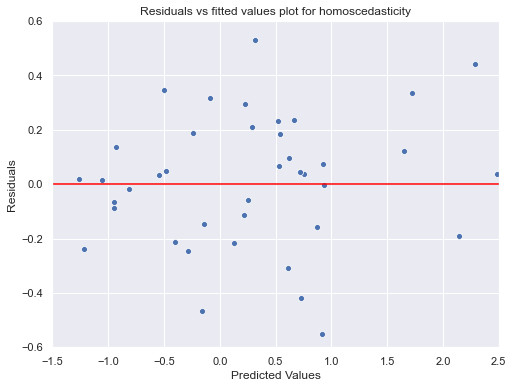

In [58]:
#Homoscedasticity means that the residuals have equal or almost equal variance across the regression line.

plt.figure(figsize=(8,6))
sct = sns.scatterplot(prediction,residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-0.6,0.6)
plt.xlim(-1.5,2.5)
sct = sns.lineplot([-1.5,2.5],[0,0],color='red')
sct = plt.title('Residuals vs fitted values plot for homoscedasticity')

### 3. Checking for patterns in residuals

#### When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. 

#### There should not be autocorrelation in the data so the error terms should not form any pattern.

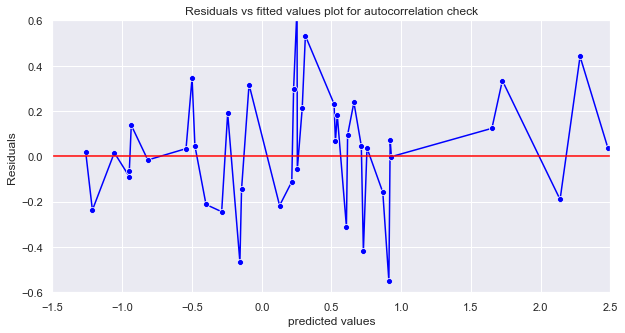

In [59]:
plt.figure(figsize=(10,5))
p = sns.lineplot(prediction,residuals,marker='o',color='blue')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.6,0.6)
plt.xlim(-1.5,2.5)
p = sns.lineplot([-1.5,2.5],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

### 4. Checking for autocorrelation.
##### To ensure the absence of autocorrelation we use Ljungbox test.
* Null Hypothesis: Autocorrelation is absent.
* Alternative Hypothesis: Autocorrelation is present.

In [60]:
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.22498939342744723

In [61]:
# we fail to reject Null Hypothesis. So, there is no autocorrelation in the error terms

### 4. Checking ACF and PACF for residuals

<Figure size 432x288 with 0 Axes>

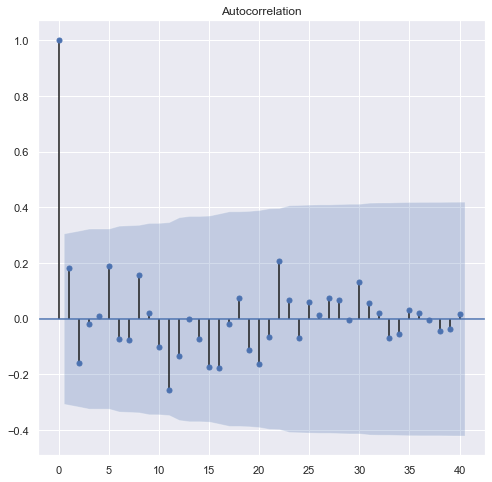

In [62]:
# Autocorrelation
plt.figure(figsize=(6,4))
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

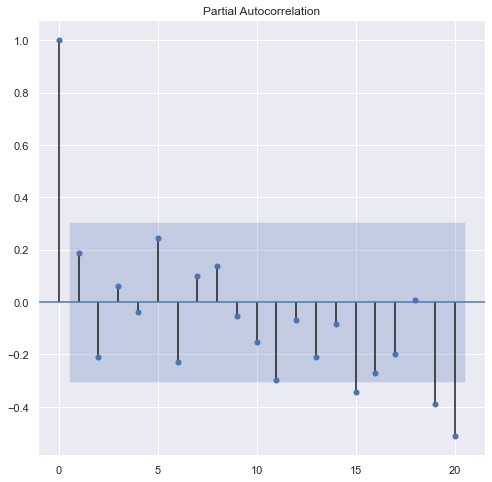

In [63]:
# Partial Autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=20)
plt.show()

### 5. No perfect multicollinearity

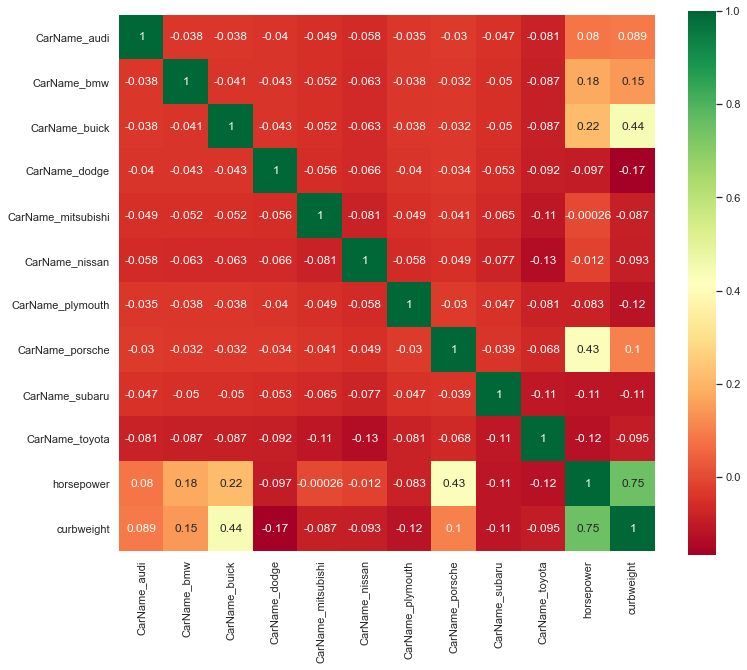

In [64]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df[sig].corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

### 6. Check for Linearity

Text(0, 0.5, 'Predicted value')

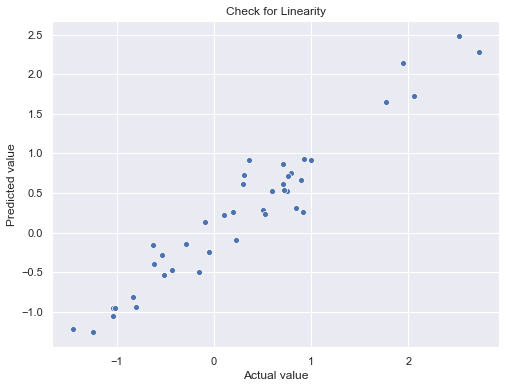

In [65]:
plt.figure(figsize=((8,6)))
sns.scatterplot(y_test['log_price'],prediction)
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

### 7. Normal Distribution of Residuals

Text(0.5, 0, 'Errors')

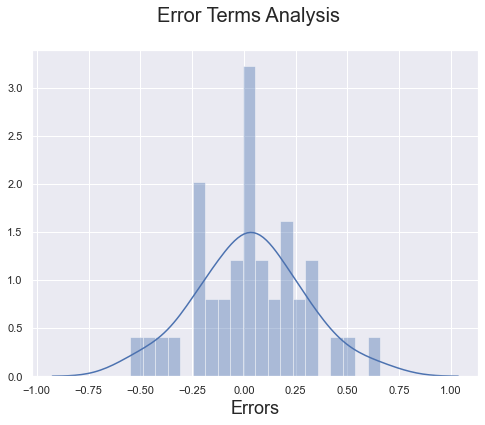

In [66]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8,6))
sns.distplot((y_test['log_price'] - prediction), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

Jarque-Bera test ---- statistic: 11.2011, p-value: 0.003695860354533398
Shapiro-Wilk test ---- statistic: 0.9802, p-value: 0.0192
Kolmogorov-Smirnov test ---- statistic: 0.2805, p-value: 0.0000
Anderson-Darling test ---- statistic: 1.2050, 5% critical value: 0.7690
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


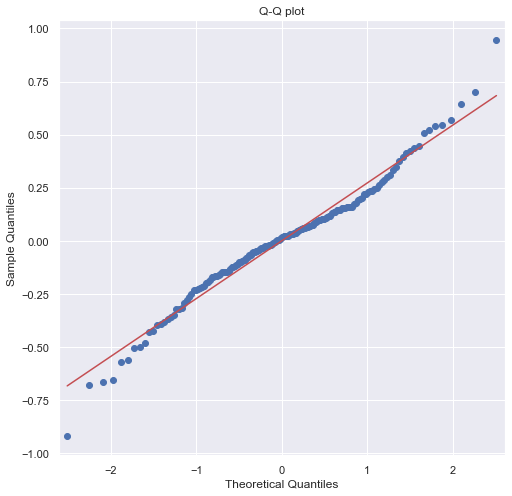

In [67]:
# Normality of Residuals
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model_1)

### 8. Checking correlation between residuals and predictor variables

In [68]:
# The X variables and residuals are uncorrelated

for column in X_train1.columns:
    corr_test = pearsonr(X_train1[column], model_1.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: nan
Variable: CarName_audi --- correlation: 0.0000, p-value: 1.0000
Variable: CarName_bmw --- correlation: 0.0000, p-value: 1.0000
Variable: CarName_buick --- correlation: 0.0000, p-value: 1.0000
Variable: CarName_dodge --- correlation: -0.0000, p-value: 1.0000
Variable: CarName_mitsubishi --- correlation: -0.0000, p-value: 1.0000
Variable: CarName_nissan --- correlation: -0.0000, p-value: 1.0000
Variable: CarName_plymouth --- correlation: -0.0000, p-value: 1.0000
Variable: CarName_porsche --- correlation: 0.0000, p-value: 1.0000
Variable: CarName_subaru --- correlation: -0.0000, p-value: 1.0000
Variable: CarName_toyota --- correlation: -0.0000, p-value: 1.0000
Variable: horsepower --- correlation: 0.0000, p-value: 1.0000
Variable: curbweight --- correlation: 0.0000, p-value: 1.0000
